# Boat sales analysis

## Introduction

The following notebook contains an analysis of a website dedicated to boat sales. The dataset contains more than 7,000 observations regarding price, type of boat and number of views among others. The objective is to get a clear view of the most seen boats and common patterns.

#### Libraries needed

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation

Let's begin by loading the data from the cloud and perform the needed actions to clean the dataset.

In [317]:
df = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/boat_data.csv')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


### Data cleaning

#### Drop columns with missing values

There are multiple missing values in the following columns that need to be addressed. I will drop them from the dataset as they are not a lot and filling them with estimations can compromise the conclusions.

In [319]:
df = df.dropna(subset=['Length', 'Width', 'Location'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9796 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9796 non-null   object 
 1   Boat Type                    9796 non-null   object 
 2   Manufacturer                 8480 non-null   object 
 3   Type                         9790 non-null   object 
 4   Year Built                   9796 non-null   int64  
 5   Length                       9796 non-null   float64
 6   Width                        9796 non-null   float64
 7   Material                     8079 non-null   object 
 8   Location                     9796 non-null   object 
 9   Number of views last 7 days  9796 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 841.8+ KB


#### Convert all prices to euros

The next step is to normalize the currency. We have data in Euros, Danish Kroner, British Pounds and Swiss Francs. It is important to convert them to one universal currency, Euros in this case. For that, I will take the current exchange rate at the day I'm writing this notebook (December 7th, 2021). 

In [320]:
# Get the currency type and its price
df['Currency'] = df['Price'].apply(lambda x: x.split(' ')[0])
df['Amount'] = df['Price'].apply(lambda x: x.split(' ')[1]).astype('int')

# Currency to euro exchange at 11:30AM of December 7th, 2021
exchange= {'CHF': 0.96, 'Â£': 1.17, 'DKK': 0.13, 'EUR': 1}

# Replace the currency values for the dictionary and calculate the new ones.
df['Exchange_EUR'] = df['Currency'].replace(exchange)
df['Price_EUR'] = df['Amount'] * df['Exchange_EUR']

#### Prepare the data for visualization

In this step, I will prepare the data for the visualizations by filtering a part of the dataframe. I have decided to take the 80 most seen ads in the last 7 days. Why? Because it represents 1% of the total observations but almost 7% of the views.

In [321]:
# Percentage of views by the top 1% of observations
print(df.sort_values('Number of views last 7 days', ascending=False)['Number of views last 7 days'].iloc[0:80].sum() / df['Number of views last 7 days'].sum() * 100,  '%')

6.575633281911182 %


Let's create a new dataframe with the 80 most seen ads and drop the columns that are not needed for the analysis and check the first five values.

In [322]:
# Get 80 most seen ads
fdf = df.sort_values('Number of views last 7 days', ascending=False).iloc[0:80]

# Drop unnecessary columns
cols_drop = ['Price', 'Currency', 'Amount', 'Exchange_EUR']
fdf = fdf.drop(columns=cols_drop)

fdf.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price_EUR
9580,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland Â» Le Landeron (NE),3263,14304.0
8723,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland Â» Neuenburgersee Â» Hauterive,2432,33600.0
6211,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland Â» Lago Maggiore Â» 6600 Locarno,2261,120864.0
3700,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt in Holstein (Ostsee),2154,949000.0
308,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland Â» Murtensee Â» Avenches,2026,19104.0


Another important thing to do before describing the dataset is check for wrong data, like the year built. In some cases, the observation is not missing but it is filled with a 0. This can compromise the analysis, i.e, the mean. 

In [323]:
fdf[fdf['Year Built'] == 0]

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price_EUR


As they are not any wrong observations, we can proceed to describe the dataset and compare it to the not filtered one.

In [324]:
fdf.describe()

,Year Built,Length,Width,Number of views last 7 days,Price_EUR
count,80.000000,80.000000,80.000000,80.000000,8.000000e+01
mean,1997.875000,9.827250,3.129000,1202.562500,5.588343e+05
std,20.194231,7.171601,1.474371,445.153276,3.511859e+06
min,1901.000000,3.350000,1.550000,859.000000,3.648000e+03
25%,1989.000000,6.300000,2.355000,895.000000,2.133600e+04
50%,2003.000000,7.500000,2.590000,1019.000000,4.628000e+04
75%,2011.250000,11.030000,3.457500,1327.000000,9.340000e+04
max,2020.000000,54.400000,9.950000,3263.000000,3.100000e+07


In [325]:
df[df['Year Built'] != 0].describe()

,Year Built,Length,Width,Number of views last 7 days,Amount,Exchange_EUR,Price_EUR
count,9246.000000,9246.000000,9246.000000,9246.000000,9.246000e+03,9246.000000,9.246000e+03
mean,2004.920182,11.717422,3.552256,150.430997,3.202397e+05,0.985180,3.019198e+05
std,16.406383,6.000273,1.212540,155.088437,9.790044e+05,0.122769,9.400324e+05
min,1885.000000,1.040000,0.010000,13.000000,3.300000e+03,0.130000,3.203520e+03
25%,1999.000000,7.560000,2.550000,70.000000,4.500000e+04,1.000000,4.450000e+04
50%,2008.000000,10.500000,3.380000,108.000000,9.800000e+04,1.000000,9.500000e+04
75%,2018.000000,14.000000,4.260000,172.000000,2.590000e+05,1.000000,2.490000e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07,1.170000,3.100000e+07


We can get some valuable information from the table above:

* The average boat in the top listed ads is older (1997 vs 2005)
* This boat is also smaller in length and width.
* And the most important one, it is a little bit cheaper than the median of the whole set.

Let's perform some visual analysis to check out our hypotheses. 

## Data visualization

Let's start by setting up the seaborn settings we will use for the analysis.

In [377]:
sns.set_palette('Blues_r')

#### Do the most expensive boats get the most views?

This is probably the main question that may arise from the dataset. It is reasonable to think that more expensive boats will receive move views. Let's check it out by drawing a scatterplot.

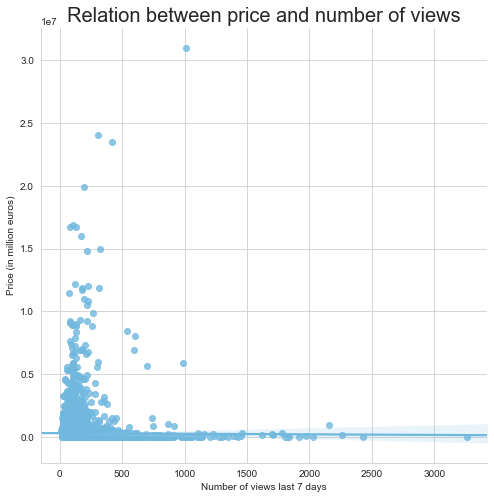

In [511]:
fig, ax = plt.subplots(figsize=[8,8])

sns.set_style('whitegrid')

g = sns.regplot(data=df, x='Number of views last 7 days', y='Price_EUR', color='#71B8DF', truncate=False)
ax.set_ylabel('Price (in million euros)')
ax.set_xlabel('Number of views last 7 days')
ax.set_title('Relation between price and number of views', fontsize=20)

sns.despine()

plt.savefig('slides/images/prices.png', transparent=True, bbox_inches="tight", dpi=440)

plt.show()

As the graph shows, there is not any relation between the number of views and the price. This means that the most expensive boats are not getting the majority of attention and it makes sense. People may want to see expensive and overpriced boats but it is not functional. Majority of them cannot afford them so they search for more affordable boats. Let's check if the size or the year they were built make any difference.

#### Does the newer boats make the top of the list?

Another question that may arise is the age of the boats listed at the top. Are they old? Are they new? How they compare to the average of the whole dataset? Let's find out.

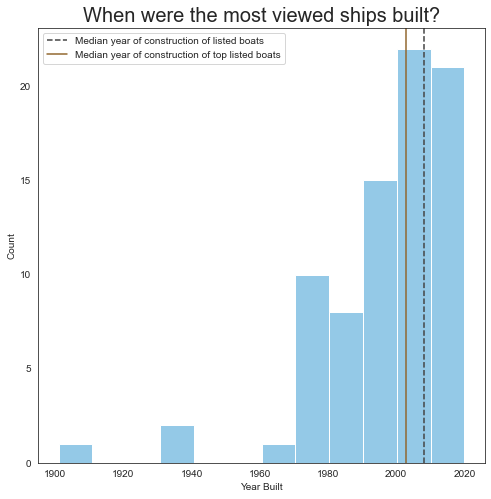

In [513]:
fig, ax = plt.subplots(figsize=[8,8])

sns.set_style('white')

g = sns.histplot(data=fdf, x='Year Built', color='#71B8DF')
ax.set_title('When were the most viewed ships built?', fontsize=20)

# Plot the median of the dataframe
x_line = df[df['Year Built'] != 0]['Year Built'].median()
ax.axvline(x=x_line, color='#434343', linestyle='--', label='Median year of construction of listed boats')
x_line2 = fdf[fdf['Year Built'] != 0]['Year Built'].median()
ax.axvline(x=x_line2, color='#91662D', linestyle='-', label='Median year of construction of top listed boats')

ax.legend()

plt.savefig('slides/images/years.png', transparent=True, bbox_inches="tight", dpi=440)

plt.show()


And, as we can see, the top 80 most viewed boats are pretty new, but not as new as the total. The median of the most viewed boats is 2003.

#### How does the size compare to the most viewed ads?

Do users prefer bigger ships? Do the widest ships make the top of list? Let's find out.

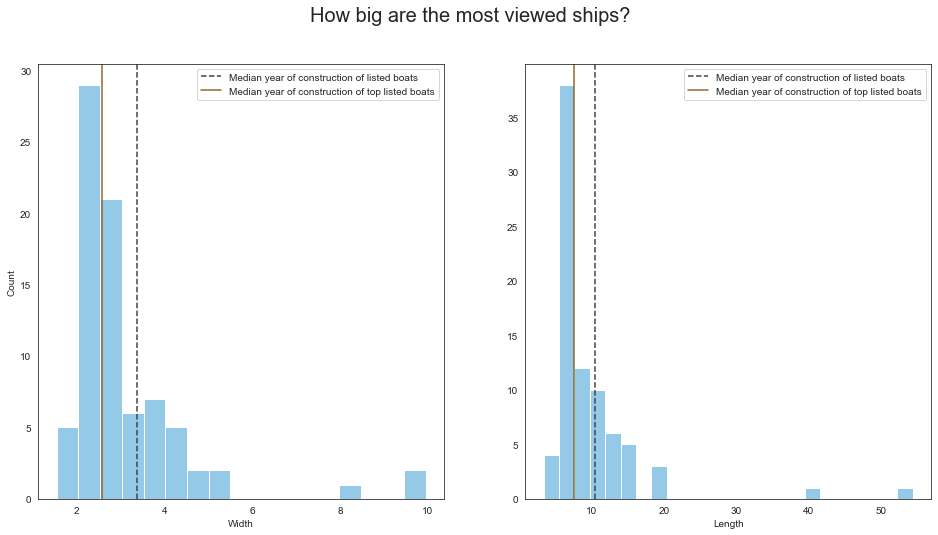

In [514]:
fig, axs = plt.subplots(1, 2, figsize=[16,8])

sns.set_style('white')

fig.suptitle('How big are the most viewed ships?', fontsize=20)

# Width
sns.histplot(data=fdf, x='Width', color='#71B8DF', ax=axs[0])
# Plot the median of the dataframe
x_line = df[df['Year Built'] != 0]['Width'].median()
axs[0].axvline(x=x_line, color='#434343', linestyle='--', label='Median year of construction of listed boats')
x_line2 = fdf[fdf['Year Built'] != 0]['Width'].median()
axs[0].axvline(x=x_line2, color='#91662D', linestyle='-', label='Median year of construction of top listed boats')
axs[0].legend()

# Length
sns.histplot(data=fdf, x='Length', color='#71B8DF', ax=axs[1])
axs[1].set_ylabel(None)
# Plot the median of the dataframe
x_line = df[df['Year Built'] != 0]['Length'].median()
axs[1].axvline(x=x_line, color='#434343', linestyle='--', label='Median year of construction of listed boats')
x_line2 = fdf[fdf['Year Built'] != 0]['Length'].median()
axs[1].axvline(x=x_line2, color='#91662D', linestyle='-', label='Median year of construction of top listed boats')
axs[1].legend()

plt.savefig('slides/images/size.png', transparent=True, bbox_inches="tight", dpi=440)

plt.show()


We can get some really important insights from this visualization. The most viewed boats are smaller than the average. The majority of them are 3 meters wide and 7.5 meters long. This means that people prefer smaller ships. And again, it makes sense. Smaller ships are more affordable.

#### Most common characteristics in the most viewed ships.

In this part, I will try to analyze common characteristics of the most viewed ships like the material, the type of boat... Let's start with the type of boat. Will sports boats make the top of the list?

_To make more accurate results, only the boat types with more than 1 occurrence are plotted in the graph._

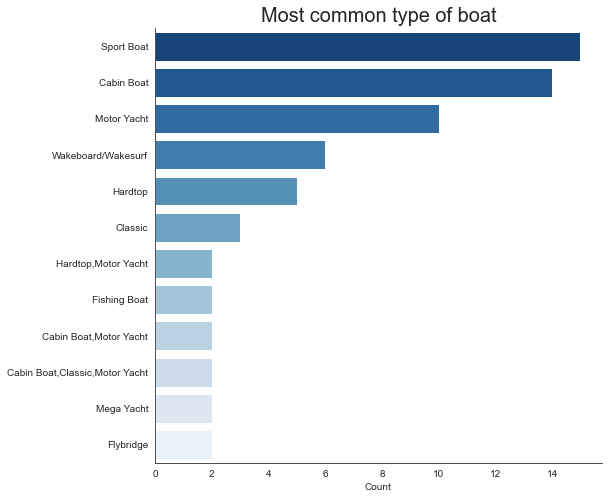

In [515]:
# Define the dataframe to plot
plot_df = fdf.groupby('Boat Type').filter(lambda x: len(x) > 1)

# Plot the visualization 
sns.set_style('white')

fig, ax = plt.subplots(figsize=[8,8])

sns.countplot(data=plot_df, y='Boat Type', order=plot_df['Boat Type'].value_counts().index, palette='Blues_r')
ax.set_title('Most common type of boat', fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel('Count')

sns.despine()

plt.savefig('slides/images/types.png', transparent=True, bbox_inches="tight", dpi=440)

plt.show()


And yes! Sports boats are the most popular ones on the site. This boats are small and cheap. People can afford them so its more likely to be on the top of the rank. Cabin boats are also small and affordable so, selling those type of boats, will give the users more chance of being visible. 

Now, let's check the materials of the boats. Is there one specific material that tops the list?

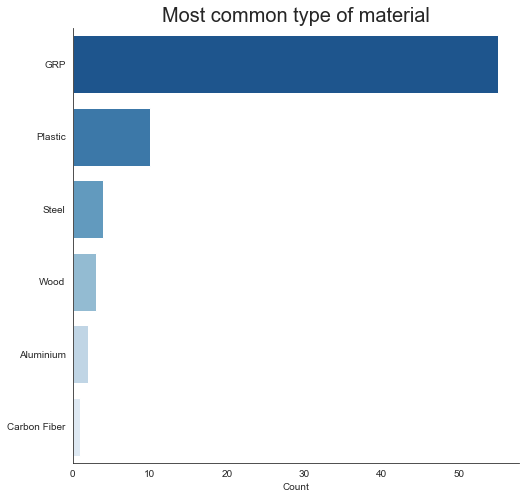

In [516]:
fig, ax = plt.subplots(figsize=[8, 8])

sns.set_style('white')

sns.countplot(data=fdf, y='Material', order=fdf['Material'].value_counts().index, palette='Blues_r')
ax.set_title('Most common type of material', fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel('Count')

sns.despine()

plt.savefig('slides/images/materials.png', transparent=True, bbox_inches="tight", dpi=440)

plt.show()

And we have a winner! GRP boats are the most common material of boats! Pound for pound, GRP (also known as fiber glass), is lighter and stronger than aluminum or steel. Smaller boats are typically made of this so, its another reason to believe that smaller boats make the top of the list.

## Conclusion

Here it comes! The part we were all waiting for...

After analyzing the whole dataset with the objective of showing what are the common characteristics in the most viewed boats, we can conclude the following:

* Cheaper boats make the top of the list.
* Smaller boats as well.
* Sports and cabin boats are the most common ones.
* GRP is the most common material.

Putting all previous insights together, we can say that announcing a well-priced boat, which is usually smaller, will give the user more probabilities of being visible than a big and expensive boat. People are using the website to buy sports and cabin boats, probably because they are more affordable than yatches.